# Deep Learning Glossary
We will learn about deep learning components and terminologies

### Activation Function
- To allow Neural Networks to learn complex decision boundaries
- we apply a nonlinear activation function to some of its layers
- Commonly used functions include:
    - softmax, sigmoid, tanh, ReLU (Rectified Linear Unit) and variants of these

`model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=x.shape[1]))`

### Loss Function (Cost Function)
When we build a neural network, the neural network tries to predict the output as close as possible to the actual value

- For prediction type problem the cost functions are:
    - MSE, MAE, ...
    - `model.compile(optimizer='rmsprop', loss='mse')`
    
- For classification type problem the cost functions are:
    - Categorical Cross-Entropy, Binary Cross-Entropy
    - `model.compile(optimizer='rmsprop', loss='binary_crossentropy')`

### Algorithms (or Optimization Methods) to Minimize Error
- **Gradient Descent:** To think of it intuitively, while climbing down a hill you should take small steps and walk down instead of just jumping down at once. Therefore, what we do is, if we start from a point x, we move down a little i.e. delta h, and update our position to x-delta h and we keep doing the same till we reach the bottom

- **Stochastic gradient descent (SGD)**

- **Learning rate:** Both GD and SGD need learning rate to adjust the new weight
    - w1_new= w1 + (learning rate)* (derivative of cost function wrt w1)
    - RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

### Dropout
- Dropout is a regularization technique for Neural Networks that prevents overfitting
- `model.add(Dropout(0.25))`

![Applying Dropout to NN](../images/dropout.png)

### Epoch and Batch
- Epoch is when an ENTIRE dataset is passed forward and backward through the neural network
    - `model.fit(x, y, epochs=10, validation_data=(x_val, y_val))`
    
- Batch is number of samples per gradient update
    - `model.fit(x, y, batch_size=2, epochs=10)`

### Batch Normalization
- Batch Normalization is a technique that normalizes the data even at hidden layers
- `model.add(BatchNormalization())`

## Activity: Apply NN with Keras on iris data
- Use 100 samples for training and 50 samples for validation
- Set the value of epoch to 5
- Change the batch_size value from 1 to 100 and plot the accuracy versus batch_size
- Change the verbose to 0, 1 and 2

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

inp = Input(shape=(4,))
x = Dense(16, activation='sigmoid')(inp)
out = Dense(3, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)

Using TensorFlow backend.


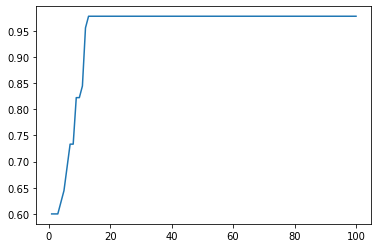

In [2]:
import matplotlib.pyplot as plt

batch_sizes = list(range(1, 101))
accuracies = []
for i in batch_sizes:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_one_hot, epochs=5, batch_size=i, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
    accuracies.append(accuracy)
    
plt.plot(batch_sizes, accuracies)

## Activity: Apply Lambda Layer in Keras and test how it works
- Write a code that takes a array with size 3 and apply a Lambda Layer in Keras to double the arrays elements

In [3]:
from keras.layers import Lambda, Input
from keras.models import Model
import numpy as np

input = Input(shape=(3,))
double = Lambda(lambda x: 2 * x)(input)

model = Model(input=input, output=double)
model.compile(optimizer='sgd', loss='mse')

data = np.array([[5, 12, 1]])
print(model.predict(data))

[[10. 24.  2.]]


/Users/tannerwyork/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("la...)`
  
